In [1]:
from tilepy.tools.VisualizationTools import Pretty_Plot
from tilepy.include.ObservationScheduler import getdate
from tilepy.include.PointingTools import (ObservationParameters, LoadHealpixMap)


/opt/miniconda3/envs/tilepyenv_1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Adjust the following as desired

In [2]:
#adjust the following as desired
alertType = 'gw'
configDir = '../config/'
datasetDir = '../../tilepy/dataset/'
outDir = '../paperplots/'
galcatName = "Gladeplus.h5"
pointingsFile = None
locCut = 500

Choose one of the follwing 4 examples

In [3]:
skymap = 'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2023/bn231012231/quicklook/glg_healpix_all_bn231012231.fit'
obsTime = getdate("2023-10-12 20:42:18")

name = 'GRB231012A_PWG'
PointingsFile1 = '../sciencecases/bn231012231/PGWinFoV_NObs/SuggestedPointings_GWOptimisation_LST1.txt'
PointingsFile2 = '../sciencecases/bn231012231/PGWinFoV_NObs/SuggestedPointings_GWOptimisation_LST2.txt'
dirName = '../paperplots'


Procceed with the cells one by one 

In [4]:
cfgFile = "../config/FollowupParameters_LST.ini"
obspar = ObservationParameters()
obspar.add_parsed_args(skymap, obsTime, datasetDir, galcatName, outDir, pointingsFile, alertType, locCut)
obspar.from_configfile(cfgFile)
print(obspar)

============== Main parsed observation parameters ==============  
Observatory Name: LST
Observatory: 28.761944 deg
Observatory: -17.89 deg
Observatory: 2200.0 m
Max zenith: 70
Using Greytime is: False
FOV: 2.5
Max runs: 4
Duration: 20
High Resolution NSIDE: 512
Low Resolution NSIDE: 256
The strategy is (2D, None, mangrove=False)
The level of details is (doPlot=True, doRank = True)



In [5]:
prob, distmu, distsigma, distnorm, detectors, fits_id, thisDistance, thisDistanceErr = LoadHealpixMap(skymap)

Loading HEALPix map from file: https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2023/bn231012231/quicklook/glg_healpix_all_bn231012231.fit


Starting the pointing plotting from the following files

Loading map from  https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2023/bn231012231/quicklook/glg_healpix_all_bn231012231.fit
Filename 1:  ../sciencecases/bn231012231/PGWinFoV_NObs/SuggestedPointings_GWOptimisation_LST1.txt
Filename 2:  ../sciencecases/bn231012231/PGWinFoV_NObs/SuggestedPointings_GWOptimisation_LST2.txt
Loading pointings
Loading pointings from ../sciencecases/bn231012231/PGWinFoV_NObs/SuggestedPointings_GWOptimisation_LST1.txt
Loading pointings from ../sciencecases/bn231012231/PGWinFoV_NObs/SuggestedPointings_GWOptimisation_LST2.txt
Summary of 1st file: sum(PW)= 0.2486 sum(PGAL)= 6 total pointings 6
Summary of 2st file: sum(PW)= 0.2066 sum(PGAL)= 6 total pointings 6


UnitConversionError: Can only apply 'add' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan).

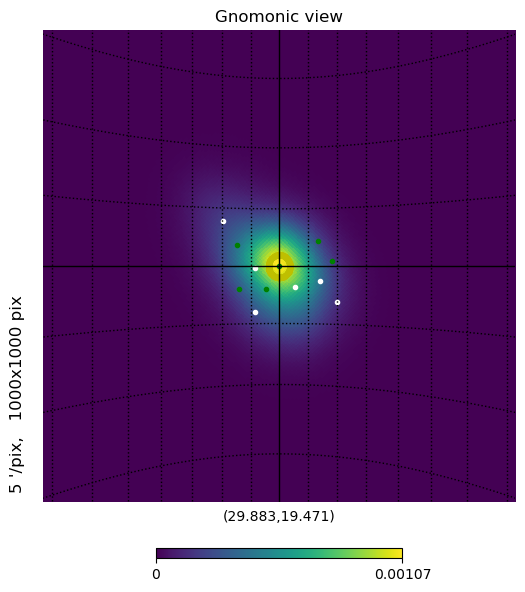

In [8]:
#Pretty_Plot(skymap, name, PointingsFile1, dirName, obspar, tGals0, center, radius, colors_list)
#from importlib import reload
#import tilepy
#reload(tilepy)
from tilepy.tools.VisualizationTools import CompareTwoTilings
plotType = 'gnomonic'
CompareTwoTilings(skymap, PointingsFile1, PointingsFile2, 2.0,plotType)
plotType = 'mollweide'
CompareTwoTilings(skymap, PointingsFile1, PointingsFile2, 2.0,plotType)